<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/NN_small_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tqdm
from time import time

# Estructura de los datos.

Consideramos un caso general, una base con datos de frecuencias de especies, cada observación de dimensión $k$, y supongamos que tenemos $n$ observaciones.

El output busca ser la clasificación en una de $d$ categorías, definidas ya sea por ciudad o localización-clima (pero de un sólo tipo).


# Datos de ejemplo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset_w_tags.csv")
df.head()
from sklearn.utils import shuffle
df = shuffle(df)###El ajuste depende de este shuffle*****

In [3]:
print(df.shape)

(237, 513)


Se tienen 237 observaciones, cada una es una muestra en una "localización".
Por renglón, se tienen frecuencias de "bichos" de 510 "dominant taxa".

En este caso, $k=510$, $n=237$.

In [4]:
ytags=df['Tag']
print(ytags)

200           Shrublands_6
1                 Boreal_9
17            Grasslands_7
99           Dry forests_0
220    Temperate forests_0
              ...         
138          Dry forests_0
213          Dry forests_0
4             Grasslands_6
2           Cold forests_1
5             Grasslands_9
Name: Tag, Length: 237, dtype: object


In [5]:
ytags

200           Shrublands_6
1                 Boreal_9
17            Grasslands_7
99           Dry forests_0
220    Temperate forests_0
              ...         
138          Dry forests_0
213          Dry forests_0
4             Grasslands_6
2           Cold forests_1
5             Grasslands_9
Name: Tag, Length: 237, dtype: object

In [6]:
import numpy as np
_,idx = np.unique(ytags,return_inverse=True)

Dados los datos con su respectiva clasificación. (En el ejemplo $d=12$)


Lamentablemente los datos tienen clases sub-representadas

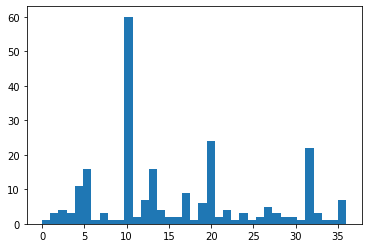

In [7]:
plt.hist(idx,bins=37)
plt.show()#Mala representatividad de clases.

# Definición del modelo.

# Partición de datos

In [8]:
from keras.utils import to_categorical
X_total=df.drop(columns=['Tag','Dominant_taxa_ID/ID_Environmental'])
Y_total=to_categorical(idx)

In [9]:
X_train=X_total[0:200]#200?
Y_train=Y_total[0:200]

In [10]:
df.head()
k,n=X_train.shape
n=n#-indice, -tag
print(k,n)

200 511


In [11]:
input_shape = (n,)#=n
output_shape=len(np.unique(ytags))

In [12]:
import tensorflow as tf
import keras
import pandas as pd
from keras import layers
from keras import models


# Capas, neuronas, funciones de activación, loss.

In [13]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(n,), name='Input_Layer'))#Obligatoria
model.add(layers.Dense(512, activation='relu'))# Numero de capas ocultas: Opcional
model.add(layers.Dense(64, activation='relu'))# Numero de neuronas en cada capa: Opcional
model.add(layers.Dense(37, activation='Softmax', name='Output_Layer'))#Obligatoria
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
import time
tic = time.time()

model.fit(x = X_train, 
           y = Y_train, 
          validation_data=[X_total[200:], Y_total[200:]],##Cuando haya otra base, se modifica ese 200
          batch_size=10,
           epochs=20,
           verbose=2,shuffle=True)

print('seconds=', time.time()-tic)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               262144    
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 Output_Layer (Dense)        (None, 37)                2405      
                                                                 
Total params: 297,381
Trainable params: 297,381
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 - 1s - loss: 12.8822 - accuracy: 0.3050 - val_loss: 7.0697 - val_accuracy: 0.2973 - 1s/epoch - 70ms/step
Epoch 2/20
20/20 - 0s - loss: 2.5174 - accuracy: 0.5750 - val_loss: 4.8916 - val_accuracy: 0.2703 - 117ms/epoch - 6ms/step
Epoch 3/20
20/20 - 0s - loss: 1.1204 - accuracy: 0.7250 - val_loss: 4

In [ ]:
model.save('primer_intento.h5')

In [17]:
import numpy as np

test_predicted_labels = model.predict(X_total[200:])
test_true_labels      = np.argmax(Y_total[200:],axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

2/2 [==============================] - 0s 7ms/step


In [15]:
Val_pred=model.predict(X_total[200:])
Val_true=Y_total[200:]

2/2 [==============================] - 0s 8ms/step


In [18]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,roc_auc_score

from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

accuracy = accuracy_score(test_true_labels,test_predicted_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_true_labels,test_predicted_labels,average='weighted',zero_division=1)
print('Precision: %f',precision)
# recall: tp / (tp + fn)
recall = recall_score(test_true_labels,test_predicted_labels,average='weighted',zero_division=1)
print('Recall: %f' , recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_true_labels,test_predicted_labels,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.486486
Precision: %f 0.5910553410553411
Recall: %f 0.4864864864864865
F1 score: 0.415454


Bajo desempeño.